This notebook walks through the basics of how to manually create a small graph and plot it using the networkx package.  

In each of the following notebooks focused on learning the basics of NetworkX we will use the first Python cell to import the networkx package (and any other packages we end up needing). We are also including the matplotlib package so that our visualizations appear in the notebook below. 

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

The basic object we want from the networkx package is the Graph class, which will give us a way to organize nodes and edges to construct our networks. These Graph objects also allow annotations to be added to the components and will be the inputs to graph algorithms and plotting functions. In later notebooks we will look at ways to import and interact with larger graphs but here we will start by adding individual nodes an edges to an empty graph. 

In [2]:
my_ego_graph = nx.Graph()

Nodes and edges can be added to the graph individually or as a collection. The labels for the nodes (their names) can be any type of Pyton type, although as we will see the default tends to be integers starting at 0. Edges are represented as tuples and if you attempt to add an edge that contains a node label not already in the graph, the node will be added automatically. The cells below show examples of this process, as well as how to get access to the sets of nodes or edges of the current graph. 

In [3]:
my_ego_graph.add_node('Daryl')

In [4]:
my_ego_graph.add_nodes_from(['Katie','Izzy','Skye'])

In [5]:
my_ego_graph.add_edge('Daryl','Katie')
my_ego_graph.add_edge('Daryl','Skye')

In [6]:
my_ego_graph.add_edge('Daryl','Parents')
my_ego_graph.add_edge('Daryl','Siblings')

In [7]:
my_ego_graph.add_edges_from([('Skye','Katie'),('Daryl', 'Izzy'),('Izzy','Daryl'),('Parents','Siblings'),('Daryl','Siblings')])

In [8]:
print(my_ego_graph.nodes())

['Daryl', 'Katie', 'Izzy', 'Skye', 'Parents', 'Siblings']


In [9]:
print(my_ego_graph.edges())

[('Daryl', 'Katie'), ('Daryl', 'Skye'), ('Daryl', 'Parents'), ('Daryl', 'Siblings'), ('Daryl', 'Izzy'), ('Katie', 'Skye'), ('Parents', 'Siblings')]


We've now got a reasonable starting point for a graph to play with but looking at the list of edges doesn't give us much intuition for the properties of the network. Since this is a small graph, we can use some of the visualization tools to try to get a better understanding. The main function for plotting networks is the draw function, which takes a long list of parameters that control the positioning, size, shape, and color (among other things) of the nodes. The main documentation for the draw function can be found here: https://networkx.org/documentation/stable//reference/drawing.html 

The examples below show some basic ideas of how the draw parameters can change the look of a graph, and we will see some more complex examples in later notebooks as our networks get more complex. 

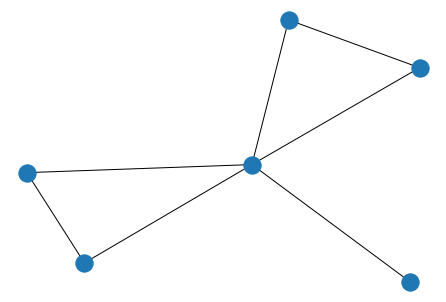

In [10]:
nx.draw(my_ego_graph)

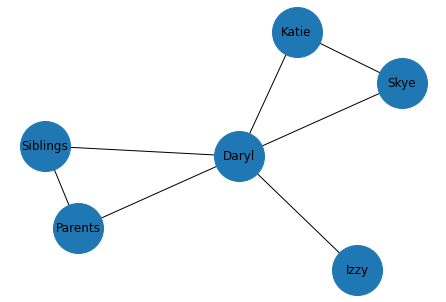

In [15]:
nx.draw(my_ego_graph,with_labels=True, node_size=2500)

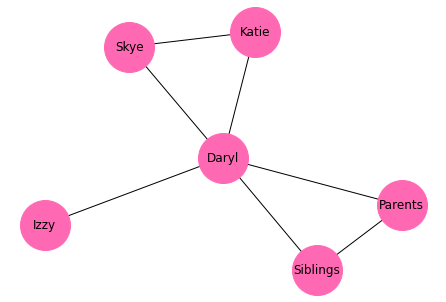

In [17]:
nx.draw(my_ego_graph,with_labels=True, node_size=2500,node_color = 'hotpink')

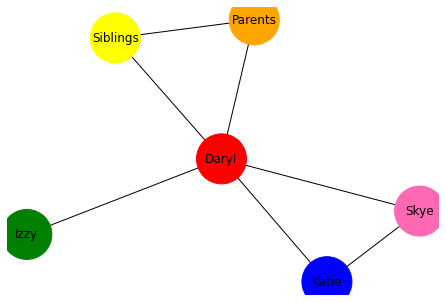

In [13]:
nx.draw(my_ego_graph,with_labels=True, node_size=2500,node_color = ['red','blue','green','hotpink','orange','yellow'])

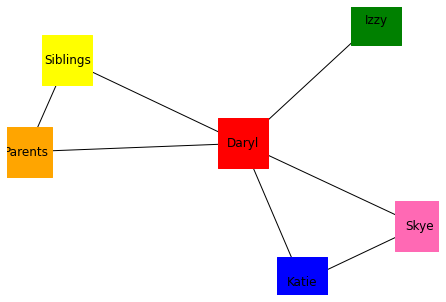

In [14]:
nx.draw(my_ego_graph,with_labels=True, node_size=2500,node_shape='s',node_color = ['red','blue','green','hotpink','orange','yellow'])

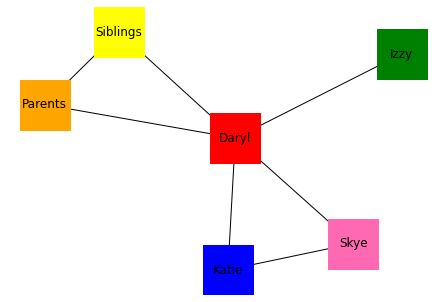

In [33]:
color_dictionary = {'Daryl':'red','Katie':'blue','Izzy':'green','Skye':'hotpink','Parents':'orange','Siblings':'yellow'}
nx.draw(my_ego_graph,with_labels=True, node_size=2500,node_shape='s',node_color = [color_dictionary[name] for name in my_ego_graph.nodes()])

**Assignment:** Create and draw your own ego graph with at least 6 nodes, following the examples given above. 

One of the nice features of networkx is that it lets us attach arbitrary annotations to the nodes and edges of our graphs, which we can use in other calculations. It is also frequently convenient to iterate over the nodes or edges of the graph, in order to set or check properties of the individual components. An example of this is given above, where we accessed the individual colors in the dictionary by evaluating each node individually. Some more complex examples are presented below.

In [18]:
my_ego_graph['Daryl']

AtlasView({'Katie': {}, 'Skye': {}, 'Parents': {}, 'Siblings': {}, 'Izzy': {}})

In [19]:
my_ego_graph['Parents']

AtlasView({'Daryl': {}, 'Siblings': {}})

In [20]:
my_ego_graph.nodes['Daryl']

{}

In [23]:
my_ego_graph.nodes['Daryl']['Age']=32

In [24]:
my_ego_graph.nodes['Daryl']


{'Age': 32}

In [25]:
my_ego_graph.nodes['Daryl']['Color']='red'

In [26]:
my_ego_graph.nodes['Daryl']


{'Age': 32, 'Color': 'red'}

In [27]:
my_ego_graph.nodes['Katie']['Age']=31
my_ego_graph.nodes['Izzy']['Age']=13
my_ego_graph.nodes['Skye']['Age']=10
my_ego_graph.nodes['Parents']['Age']=54
my_ego_graph.nodes['Siblings']['Age']=22

In [28]:
my_ego_graph['Daryl']['Katie']['Length'] = 13

In [29]:
my_ego_graph['Daryl']

AtlasView({'Katie': {'Length': 13}, 'Skye': {}, 'Parents': {}, 'Siblings': {}, 'Izzy': {}})

In [30]:
for edge in my_ego_graph.edges():
    my_ego_graph[edge[0]][edge[1]]['Age Difference'] = abs(my_ego_graph.nodes[edge[0]]['Age']-my_ego_graph.nodes[edge[1]]['Age'])

In [31]:
my_ego_graph['Daryl']

AtlasView({'Katie': {'Length': 13, 'Age Difference': 1}, 'Skye': {'Age Difference': 22}, 'Parents': {'Age Difference': 22}, 'Siblings': {'Age Difference': 10}, 'Izzy': {'Age Difference': 19}})

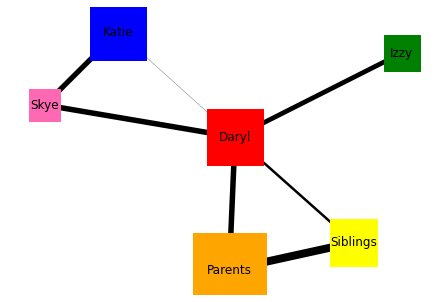

In [34]:
nx.draw(my_ego_graph,with_labels=True, node_size=[100*my_ego_graph.nodes[name]['Age'] for name in my_ego_graph.nodes()],node_shape='s',node_color = [color_dictionary[name] for name in my_ego_graph.nodes()], width = [my_ego_graph[edge[0]][edge[1]]['Age Difference']/4 for edge in my_ego_graph.edges()])

**Assignment:** Add attributes containing age and favorite color to your ego network and use those in a visualization. 